In [61]:
from gravipy.tensorial import * # import GraviPy package
from sympy import init_printing
import inspect
import sympy as sp
init_printing()

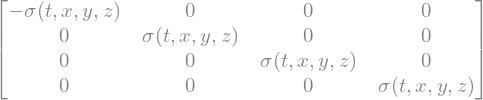

In [41]:
h, tau = symbols('h tau')
t, x, y, z = symbols('t x y z')
sig = sp.Function('sigma')(t,x,y,z)
metric = diag(-sig, sig, sig, sig)
X = Coordinates('x', [t, x, y, z])
g = MetricTensor('g', X, metric)
g(All, All)

In [44]:
Ch = Christoffel('Ch', g)

In [56]:
Rm = Riemann('Rm', g)
Ri = Ricci('Ri', g)
Ric_s = Ri.scalar()

In [59]:
mu, nu, rho, sigma = symbols('mu, nu, rho, sigma')

In [88]:
def Weyl(mu, nu, rho, sigma):
    C = Rm(mu, nu, rho, sigma) + (Ric_s/(6)) * (g(mu, rho) * g(nu, sigma) - g(mu, sigma) * g(nu, rho))
    C += (1/2) * (g(mu, sigma) * Ri(nu, rho) - g(mu, rho) * Ri(nu, sigma) + Ri(mu, sigma)* g(nu, rho) - Ri(mu, rho)*g(nu, sigma))
    return C

In [98]:
for i in range(1,5):
    for j in range(1,5):
        for k in range(1,5):
            for l in range(1,5):
                if sp.simplify(Weyl(i, j, k, l)) != 0:
                    print('Not zero!')
print('done')

done
